# Time Series Trends Analysis

## Overview
This notebook presents a comprehensive analysis of time series data from an e-commerce dataset. The aim is to uncover trends in sales, profits, discounts, and customer engagement over time, and to understand how these metrics change by category, region, and customer segment.

## Key Features:
1. **Data Loading and Preparation:**
    - Load cleaned e-commerce data from a CSV file.
    - Handle potential encoding issues and ensure compatibility with various data formats.

2. **Data Transformation:**
    - Convert date-related columns to datetime format for more accurate time series analysis.
    - Aggregate data monthly to analyze trends in sales, profits, and discounts.

3. **Visual Analysis:**
    - Generate line plots to visualize trends in monthly sales and profits.
    - Use bar plots to explore month-over-month and year-over-year changes.
    - Visualize the distribution of sales and profits by product category, region, and customer segment to identify specific patterns.

4. **Statistical Analysis:**
    - Apply polynomial trend lines to identify long-term trends in the number of orders and active customers.
    - Analyze the percentage changes from month to month and year to year to gauge business performance and growth.

5. **Strategic Insights:**
    - Provide insights into potential seasonal impacts on sales and profits.
    - Suggest strategic actions based on observed trends, such as adjusting marketing strategies, planning inventory based on sales fluctuations, and enhancing customer engagement practices.

## Tools and Libraries Used:
- Pandas for data manipulation and aggregation.
- Matplotlib and Seaborn for creating a variety of plots and visualizations.
- Numpy for numerical operations and trend line calculations.

## Visualizations Included:
- Trend Lines: Identify overarching trends in customer activity and order volumes.
- Seasonal Patterns: Highlight seasonal variations in sales across different categories and regions.
- Growth Metrics: Month-over-month and year-over-year percentage change graphs to monitor growth rates and identify potential issues.

## Conclusion:
The analysis provided in this notebook is essential for understanding the dynamics of an e-commerce business. It enables stakeholders to make informed decisions based on the historical data of sales, customer engagement, and market trends, ultimately helping to steer the business towards growth and increased profitability.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [2]:
# Set option to display all columns of the DataFrame
pd.set_option('display.max_columns', None)

In [3]:
data_path = '../data/cleaned_ecommerce.csv'

try:
    data = pd.read_csv(data_path, encoding='utf-8')
except UnicodeDecodeError:
    data = pd.read_csv(data_path, encoding='ISO-8859-1')  # Using ISO-8859-1 if UTF-8 fails


In [4]:
data

,order_id,date_ordered,date_shipped,ship_mode,customer_id,segment,city,state,postal_code,region,product_id,category,subcategory,product_name,sales,quantity,discount,profit,processing_time
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,3
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,3
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,4
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,7
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9933,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Consumer,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2
9934,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,5
9935,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,5
9936,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Consumer,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,5


| Field           | Description                                        |
|-----------------|----------------------------------------------------|
| order_id        | The unique identifier for each order.              |
| date_ordered    | The date on which the order was placed.            |
| date_shipped    | The date on which the order was shipped.           |
| ship_mode       | The mode of shipping used.                         |
| customer_id     | The unique identifier for each customer.           |
| segment         | The market segment to which the customer belongs.  |
| city            | The city in which the customer resides.            |
| state           | The state in which the customer resides.           |
| postal_code     | The postal code of the customer's location.        |
| region          | The region in which the customer resides.          |
| product_id      | The unique identifier for each product.            |
| category        | The category of the product.                       |
| subcategory     | The subcategory of the product.                    |
| product_name    | The name of the product.                           |
| sales           | The sales amount for the transaction.              |
| quantity        | The number of units sold.                          |
| discount        | The discount given on the transaction.             |
| profit          | The profit made from the transaction.              |
| processing_time | The number of days between order and shipment.     |


In [5]:
# Convert the 'date_ordered' column to datetime format
data['date_ordered'] = pd.to_datetime(data['date_ordered'])

# Aggregate sales and profit by month
monthly_sales_profit = data.groupby(data['date_ordered'].dt.to_period("M")).agg(total_sales=('sales', 'sum'), total_profit=('profit', 'sum'))

# Reset the index to make 'date_ordered' a regular column
monthly_sales_profit.reset_index(inplace=True)
monthly_sales_profit['date_ordered'] = monthly_sales_profit['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

monthly_sales_profit.head()

,date_ordered,total_sales,total_profit
0,2014-01-01,14236.895,2450.1907
1,2014-02-01,4519.892,862.3084
2,2014-03-01,55691.009,498.7299
3,2014-04-01,26770.085,3175.0868
4,2014-05-01,23467.357,2692.1286


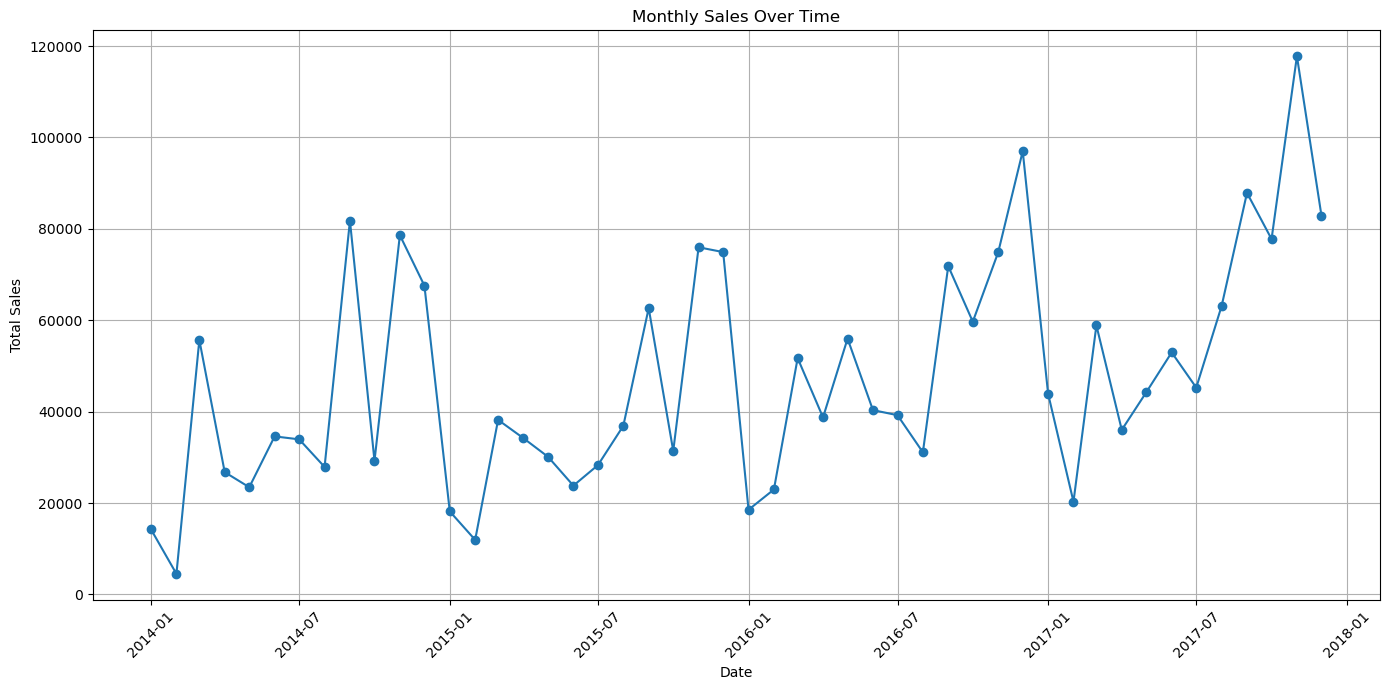

In [6]:
# Plotting the monthly sales data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales_profit['date_ordered'], monthly_sales_profit['total_sales'], marker='o', linestyle='-')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The plot of monthly sales over time shows some clear patterns that might suggest seasonal trends. There are noticeable peaks typically around the same time each year, which could be linked to specific seasonal events like holidays or back-to-school seasons. Additionally, there are periods of lower sales which might indicate off-peak seasons.


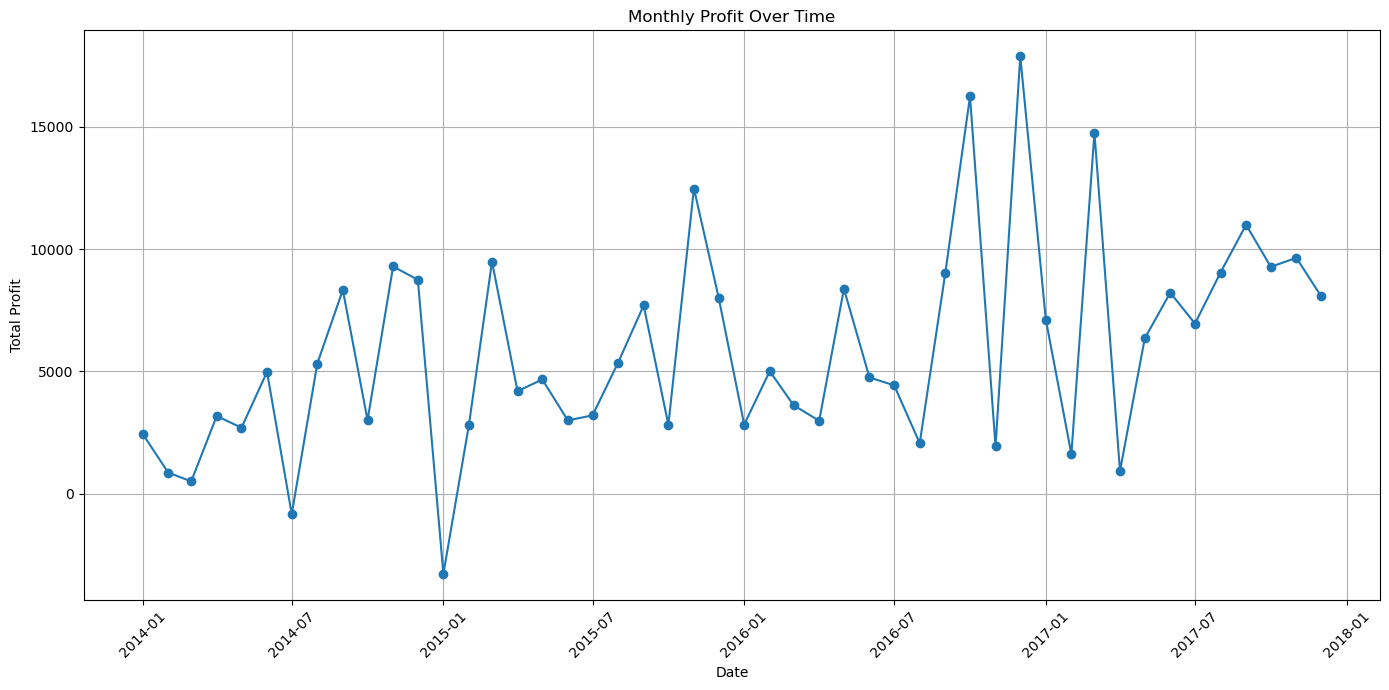

In [7]:
# Plotting the monthly sales data
plt.figure(figsize=(14, 7))
plt.plot(monthly_sales_profit['date_ordered'], monthly_sales_profit['total_profit'], marker='o', linestyle='-')
plt.title('Monthly Profit Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


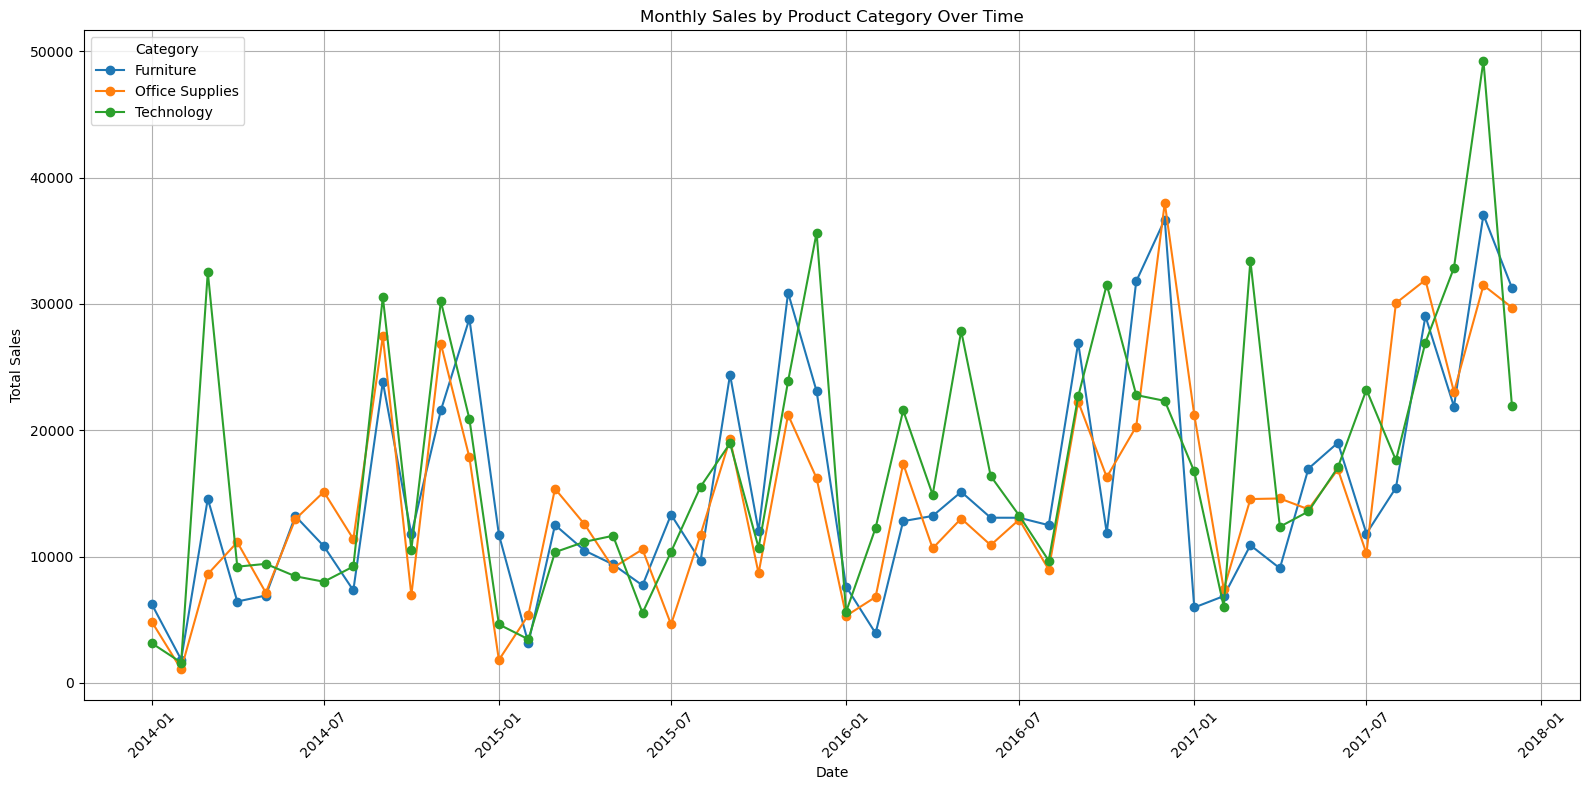

In [8]:
# Aggregate sales data by month and category
monthly_category_sales = data.groupby([data['date_ordered'].dt.to_period("M"), 'category']).agg(total_sales=('sales', 'sum')).reset_index()
monthly_category_sales['date_ordered'] = monthly_category_sales['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting sales by category
plt.figure(figsize=(16, 8))
for category in monthly_category_sales['category'].unique():
    category_data = monthly_category_sales[monthly_category_sales['category'] == category]
    plt.plot(category_data['date_ordered'], category_data['total_sales'], marker='o', label=category)

plt.title('Monthly Sales by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The graph above shows the monthly sales trends for different product categories over time. Each category exhibits some unique trends and seasonal peaks that might correlate with specific industry events or consumer behaviors.

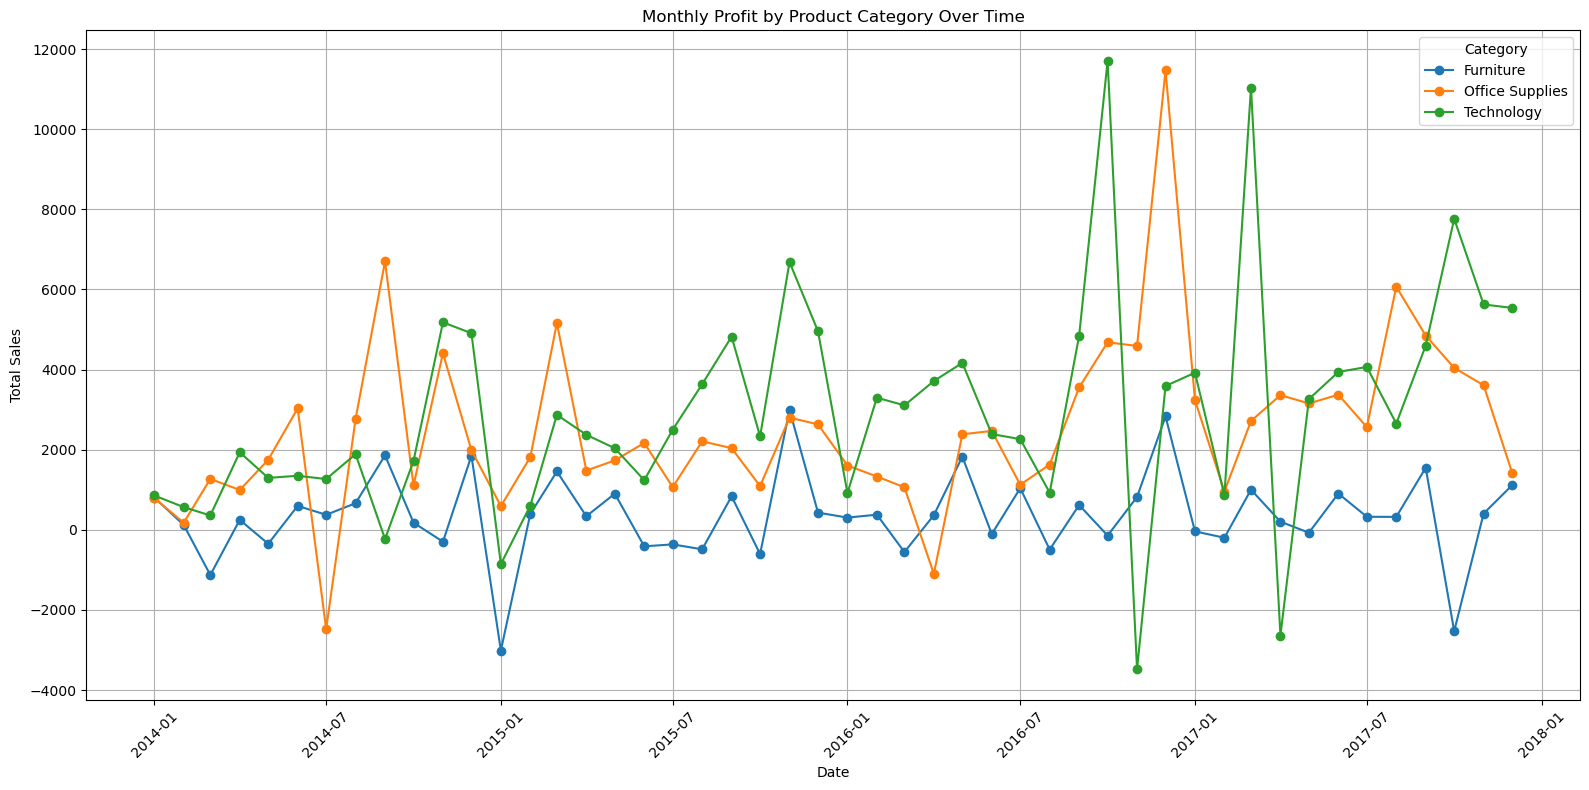

In [9]:
# Aggregate sales data by month and category
monthly_category_profit = data.groupby([data['date_ordered'].dt.to_period("M"), 'category']).agg(total_profit=('profit', 'sum')).reset_index()
monthly_category_profit['date_ordered'] = monthly_category_profit['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting profit by category
plt.figure(figsize=(16, 8))
for category in monthly_category_profit['category'].unique():
    category_data = monthly_category_profit[monthly_category_profit['category'] == category]
    plt.plot(category_data['date_ordered'], category_data['total_profit'], marker='o', label=category)

plt.title('Monthly Profit by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The graph above shows the monthly profit trends for different product categories over time. Each category exhibits some unique trends.

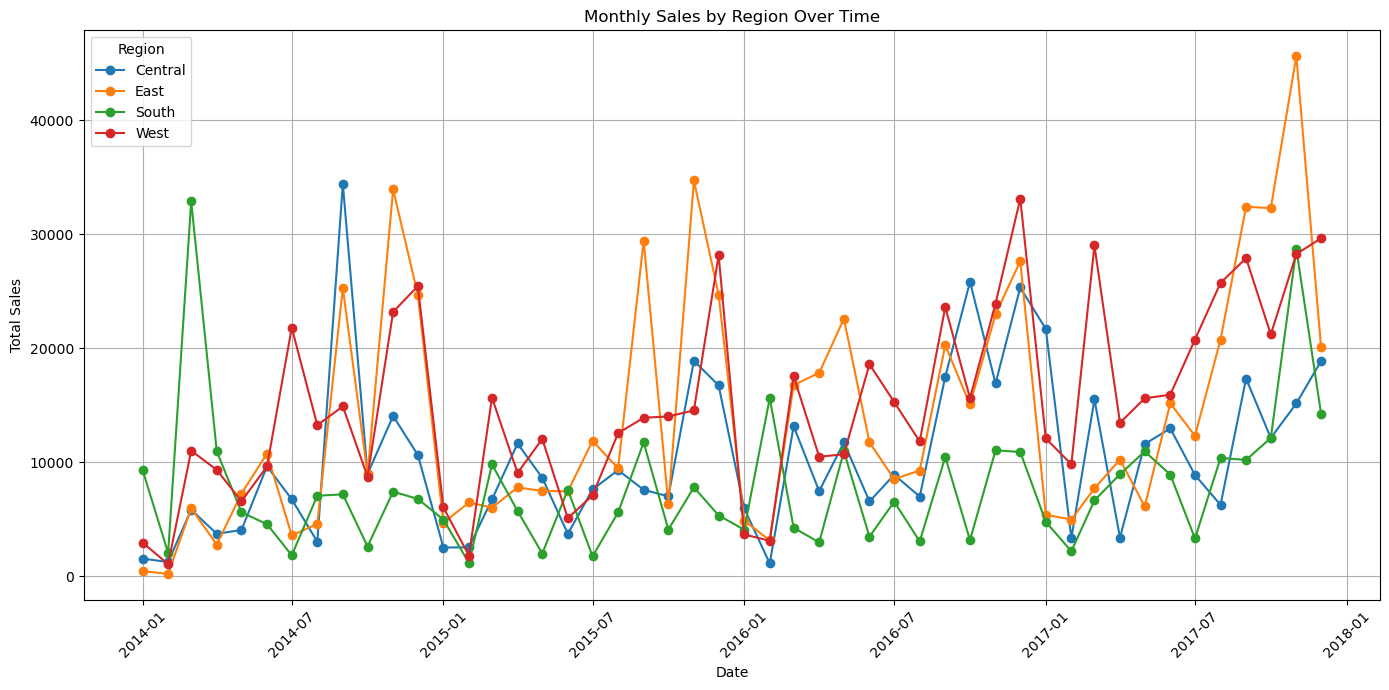

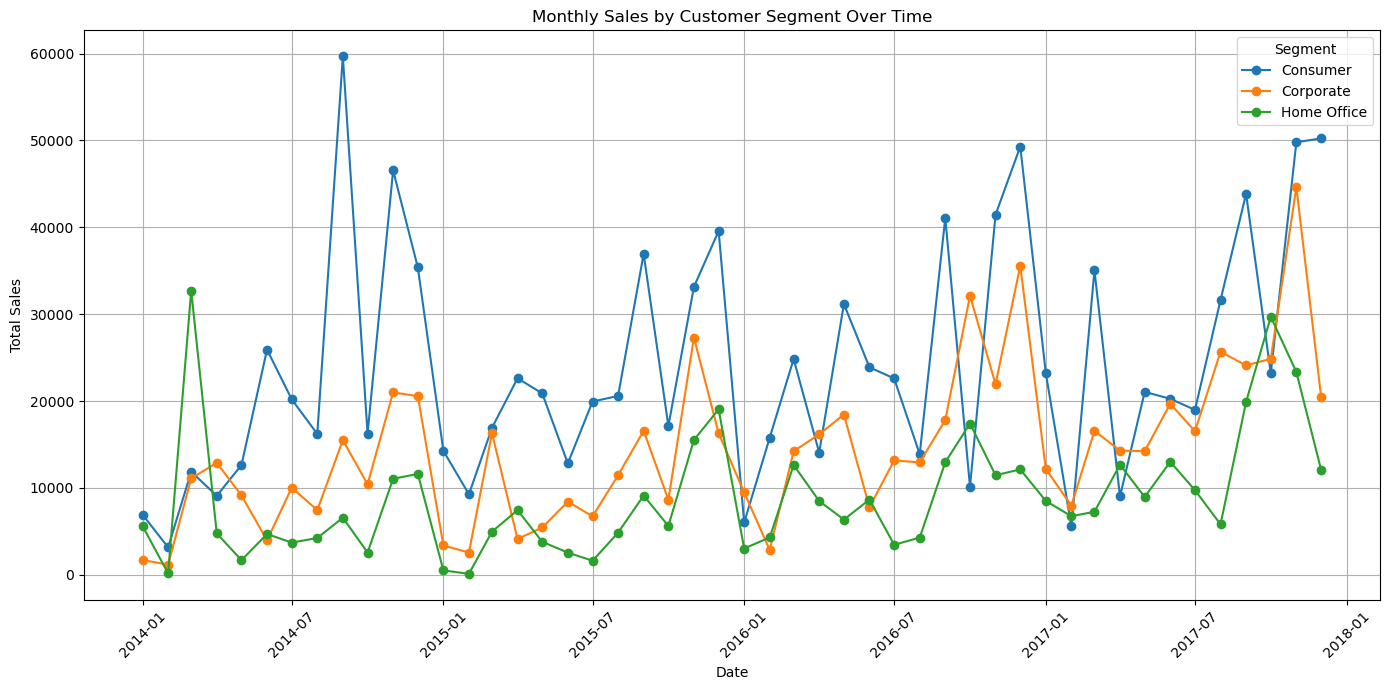

In [10]:
# Aggregate sales data by month, region, and customer segment
monthly_region_sales = data.groupby([data['date_ordered'].dt.to_period("M"), 'region']).agg(total_sales=('sales', 'sum')).reset_index()
monthly_region_sales['date_ordered'] = monthly_region_sales['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

monthly_segment_sales = data.groupby([data['date_ordered'].dt.to_period("M"), 'segment']).agg(total_sales=('sales', 'sum')).reset_index()
monthly_segment_sales['date_ordered'] = monthly_segment_sales['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting sales by region
plt.figure(figsize=(14, 7))
for region in monthly_region_sales['region'].unique():
    region_data = monthly_region_sales[monthly_region_sales['region'] == region]
    plt.plot(region_data['date_ordered'], region_data['total_sales'], marker='o', linestyle='-', label=region)

plt.title('Monthly Sales by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Region')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting sales by customer segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_sales['segment'].unique():
    segment_data = monthly_segment_sales[monthly_segment_sales['segment'] == segment]
    plt.plot(segment_data['date_ordered'], segment_data['total_sales'], marker='o', linestyle='-', label=segment)

plt.title('Monthly Sales by Customer Segment Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Segment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Sales Trends by Region**

The first plot illustrates how sales trends vary by region over time. Each region shows distinct seasonal peaks, which might be influenced by regional events or economic conditions.

**Sales Trends by Customer Segment**

The second plot displays monthly sales trends across different customer segments. Here, we also see variations in how different segments contribute to overall sales, with some segments showing more pronounced seasonal spikes than others.


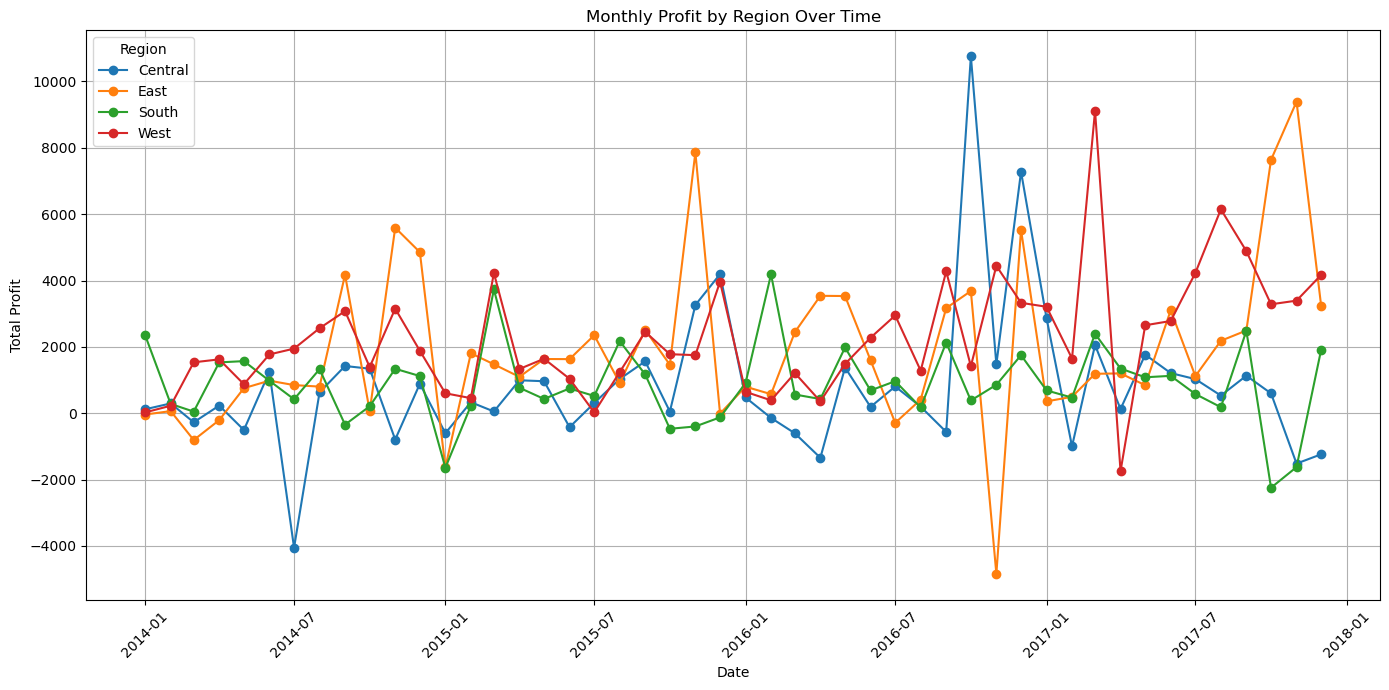

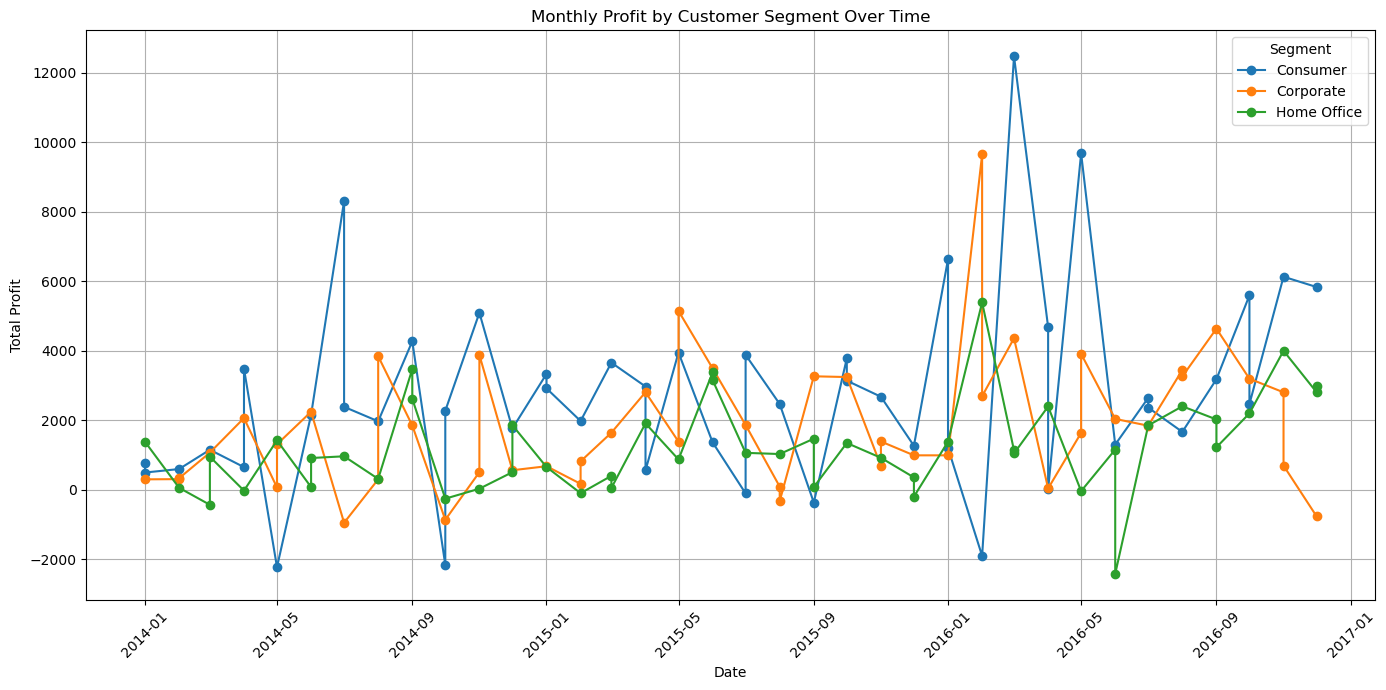

In [11]:
# Aggregate profit data by month, region, and customer segment
monthly_region_profit = data.groupby([data['date_ordered'].dt.to_period("M"), 'region']).agg(total_profit=('profit', 'sum')).reset_index()
monthly_region_profit['date_ordered'] = monthly_region_profit['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

monthly_segment_profit = data.groupby([data['date_ordered'].dt.to_period("M"), 'segment']).agg(total_profit=('profit', 'sum')).reset_index()
monthly_segment_profit['date_ordered'] = monthly_region_profit['date_ordered']#.dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting profit by region
plt.figure(figsize=(14, 7))
for region in monthly_region_profit['region'].unique():
    region_data = monthly_region_profit[monthly_region_profit['region'] == region]
    plt.plot(region_data['date_ordered'], region_data['total_profit'], marker='o', linestyle='-', label=region)

plt.title('Monthly Profit by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.legend(title='Region')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting Profit by customer segment
plt.figure(figsize=(14, 7))
for segment in monthly_segment_profit['segment'].unique():
    segment_data = monthly_segment_profit[monthly_segment_profit['segment'] == segment]
    plt.plot(segment_data['date_ordered'], segment_data['total_profit'], marker='o', linestyle='-', label=segment)

plt.title('Monthly Profit by Customer Segment Over Time')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.legend(title='Segment')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

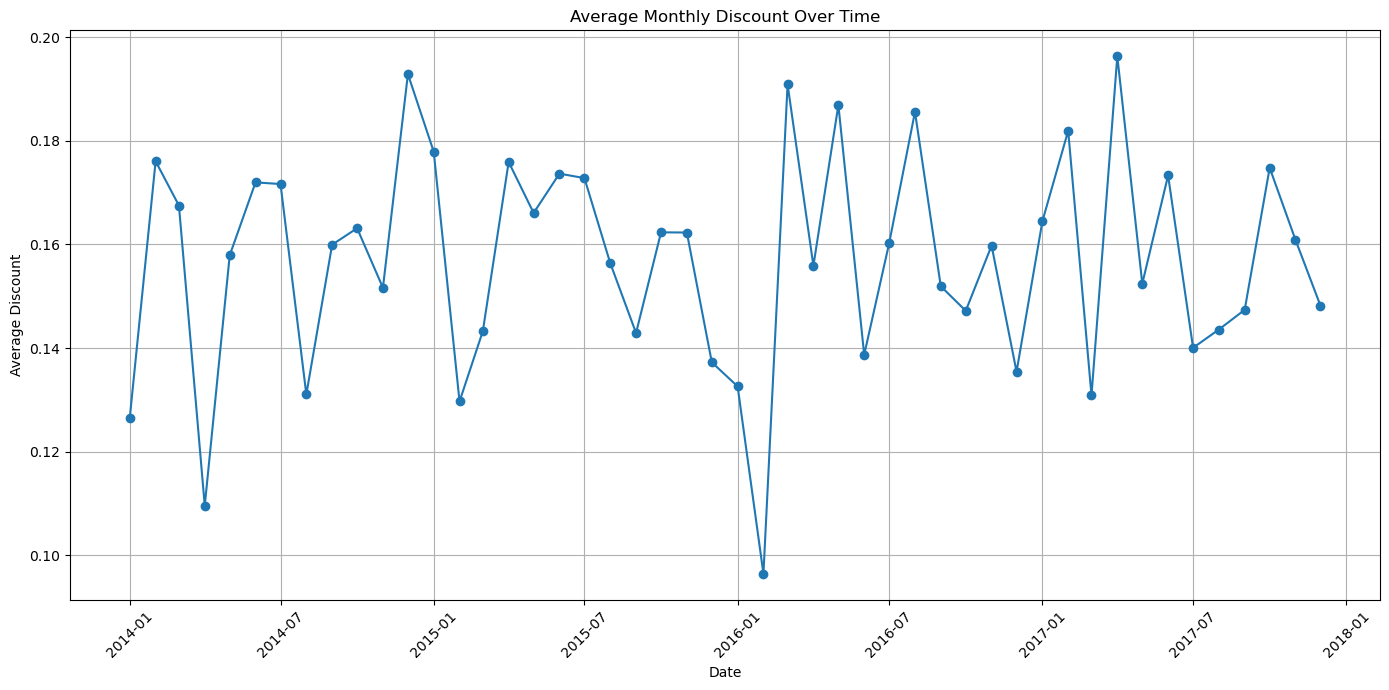

In [12]:
# Calculate the average discount by month
average_monthly_discount = data.groupby(data['date_ordered'].dt.to_period("M")).agg(average_discount=('discount', 'mean')).reset_index()
average_monthly_discount['date_ordered'] = average_monthly_discount['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting the average monthly discount
plt.figure(figsize=(14, 7))
plt.plot(average_monthly_discount['date_ordered'], average_monthly_discount['average_discount'], marker='o', linestyle='-')
plt.title('Average Monthly Discount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Discount')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The graph above shows the average monthly discount over time. It reveals any shifts in discounting strategies across different months and years. Notably, there appear to be fluctuations that could correspond to strategic sales periods, like end-of-season sales or holidays, where discounts might be used to boost purchasing.

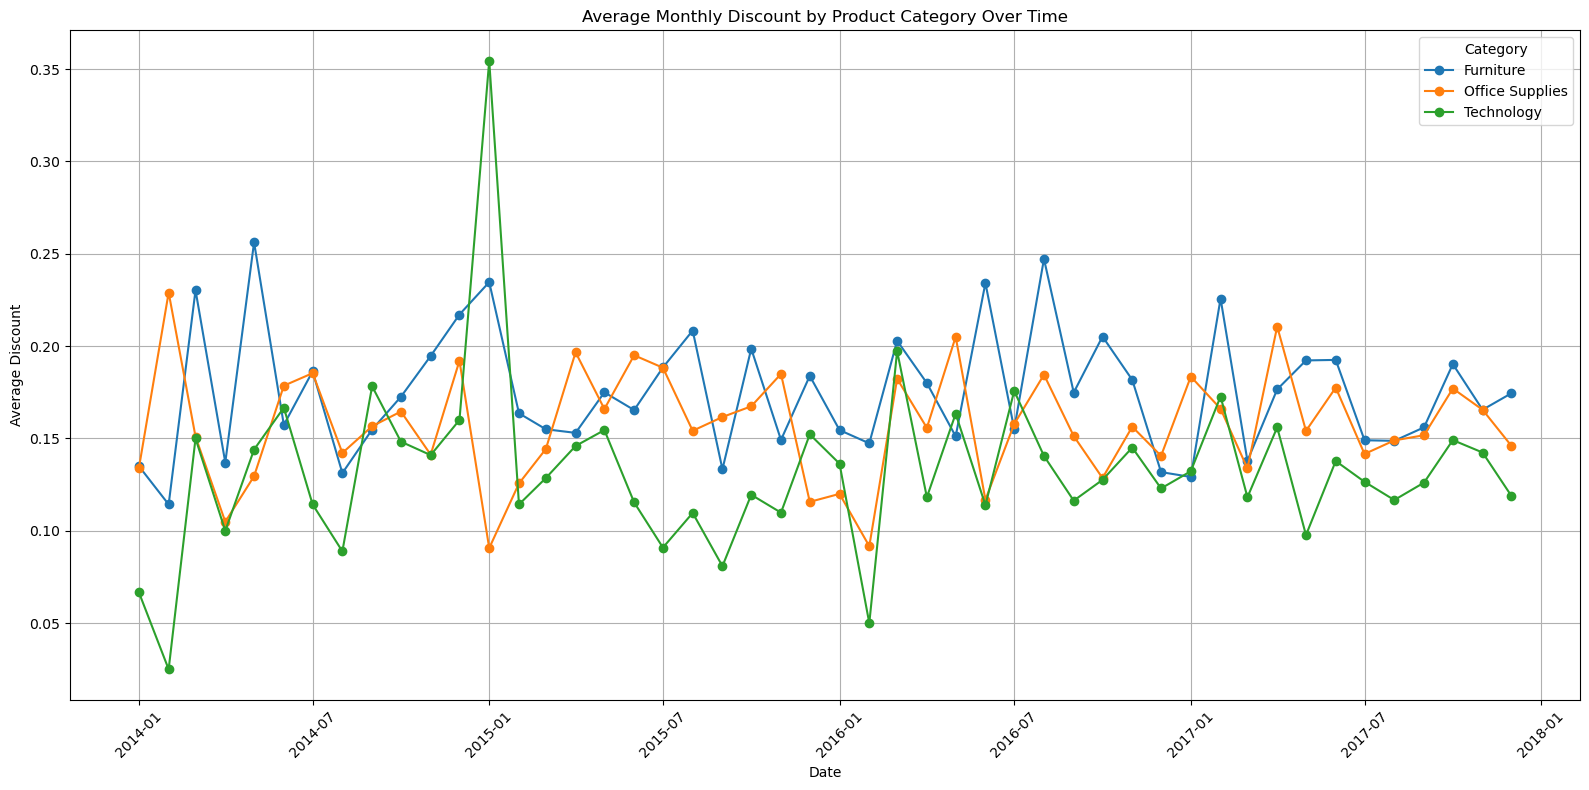

In [13]:
# Calculate the average discount by month and category
average_monthly_discount_category = data.groupby([data['date_ordered'].dt.to_period("M"), 'category']).agg(average_discount=('discount', 'mean')).reset_index()
average_monthly_discount_category['date_ordered'] = average_monthly_discount_category['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting the average discount by category
plt.figure(figsize=(16, 8))
for category in average_monthly_discount_category['category'].unique():
    category_data = average_monthly_discount_category[average_monthly_discount_category['category'] == category]
    plt.plot(category_data['date_ordered'], category_data['average_discount'], marker='o', label=category)

plt.title('Average Monthly Discount by Product Category Over Time')
plt.xlabel('Date')
plt.ylabel('Average Discount')
plt.legend(title='Category')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The graph displays the average monthly discounts for each product category over time, highlighting how discount strategies are tailored to different categories. Some categories may exhibit more frequent or higher discounts, possibly due to factors like higher competition, larger margins, or efforts to clear inventory during specific times of the year.

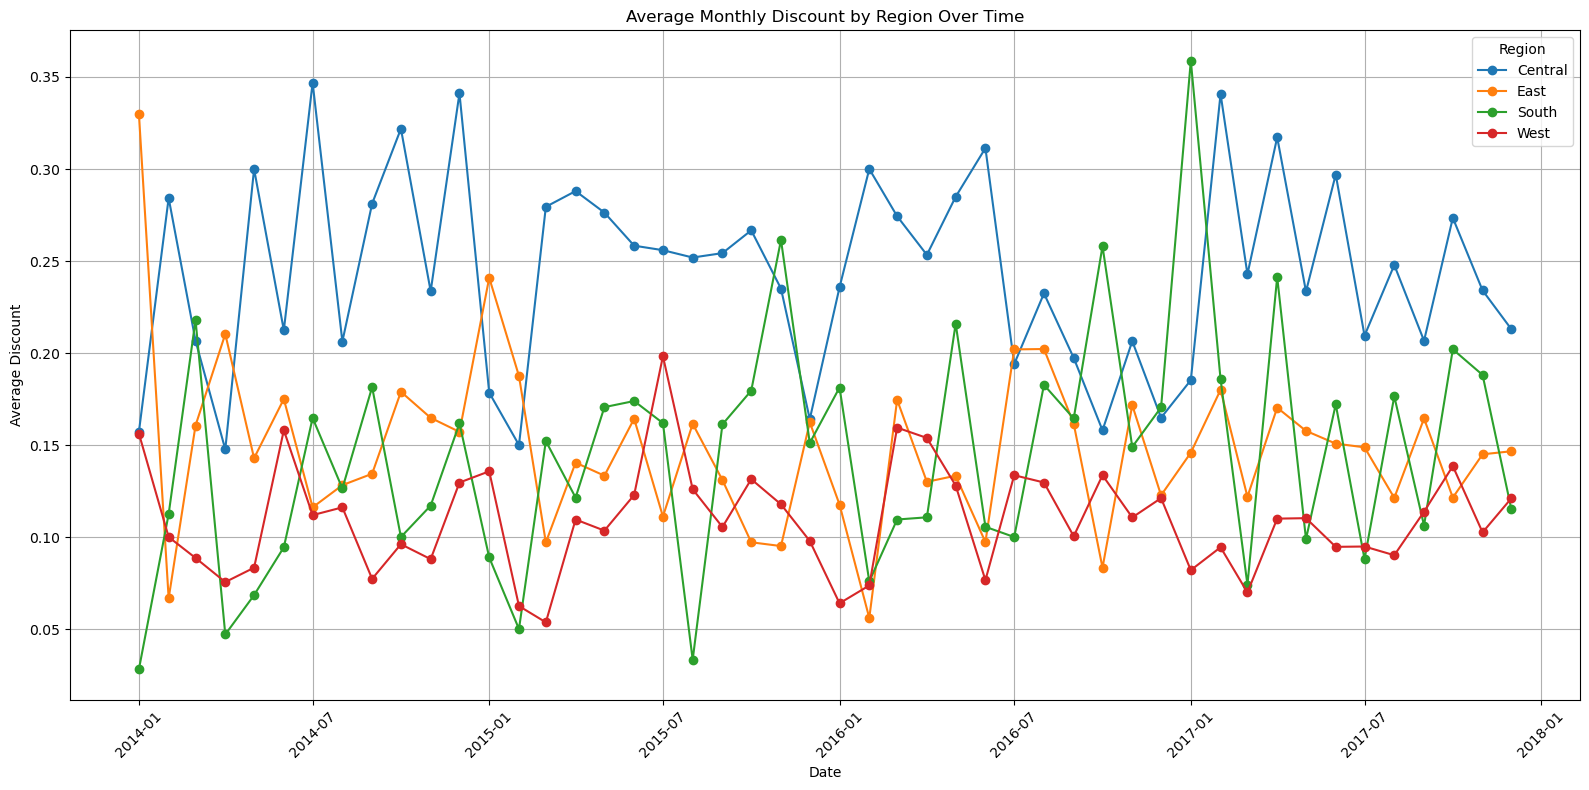

In [14]:
# Calculate the average discount by month and region
average_monthly_discount_region = data.groupby([data['date_ordered'].dt.to_period("M"), 'region']).agg(average_discount=('discount', 'mean')).reset_index()
average_monthly_discount_region['date_ordered'] = average_monthly_discount_region['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Plotting the average discount by region
plt.figure(figsize=(16, 8))
for region in average_monthly_discount_region['region'].unique():
    region_data = average_monthly_discount_region[average_monthly_discount_region['region'] == region]
    plt.plot(region_data['date_ordered'], region_data['average_discount'], marker='o', label=region)

plt.title('Average Monthly Discount by Region Over Time')
plt.xlabel('Date')
plt.ylabel('Average Discount')
plt.legend(title='Region')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The graph illustrates the average monthly discounts across different regions over time. Each region shows unique patterns in how discounts are applied, which may indicate regional strategies to maximize sales, accommodate local competition, or respond to economic factors specific to those regions.

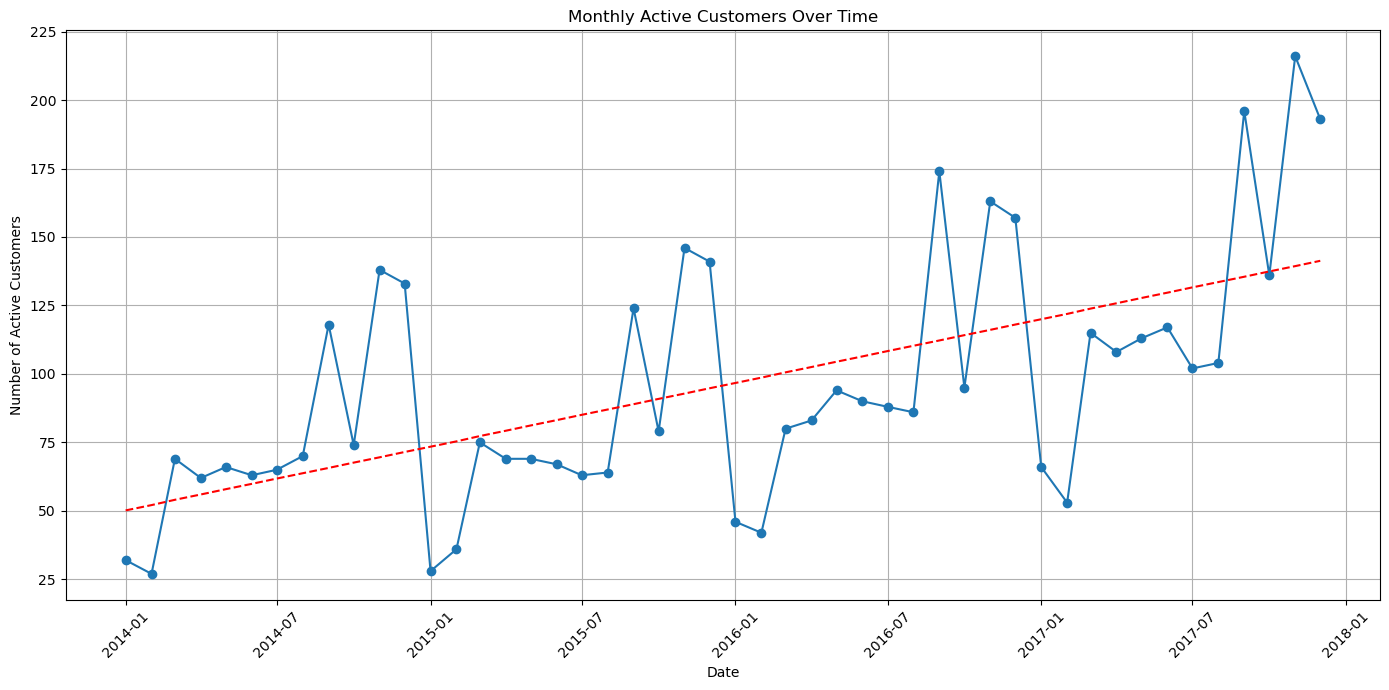

In [29]:
# Count unique customers per month
monthly_active_customers = data.groupby(data['date_ordered'].dt.to_period("M")).agg(active_customers=('customer_id', 'nunique')).reset_index()
monthly_active_customers['date_ordered'] = monthly_active_customers['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Fit polynomial trend line
x = np.arange(len(monthly_active_customers))
y = monthly_active_customers['active_customers']  
degree = 1  
coefficients = np.polyfit(x, y, degree)
p = np.poly1d(coefficients)

# Plotting the number of monthly active customers
plt.figure(figsize=(14, 7))
plt.plot(monthly_active_customers['date_ordered'], monthly_active_customers['active_customers'], marker='o', linestyle='-')
plt.plot(monthly_active_customers['date_ordered'], p(x), "r--", label='Trend Line')


plt.title('Monthly Active Customers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Active Customers')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


The number of active customers is growing over time. This can be indicative of successful customer retention strategies, effective marketing, and overall positive customer satisfaction and engagement.

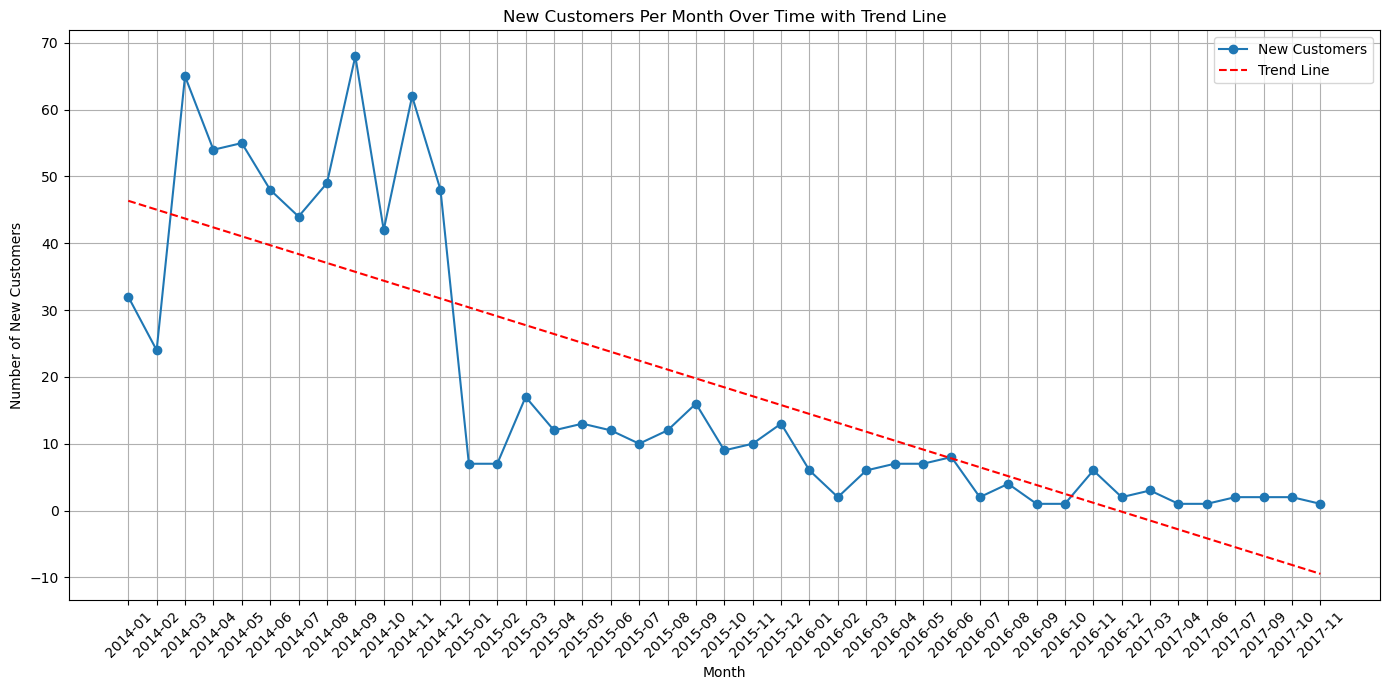

In [28]:
import numpy as np

# Convert 'Month' from period to datetime to work with numerical calculations for trendline
new_customers_per_month['Month_dt'] = new_customers_per_month['Month'].dt.to_timestamp()

# Create a linear regression line (trend line)
z = np.polyfit(new_customers_per_month.index, new_customers_per_month['New Customers'], 1)
p = np.poly1d(z)

# Plotting the time series of new customers per month with a trend line
plt.figure(figsize=(14, 7))
plt.plot(new_customers_per_month['Month'].astype(str), new_customers_per_month['New Customers'], marker='o', label='New Customers')
plt.plot(new_customers_per_month['Month'].astype(str), p(new_customers_per_month.index), "r--", label='Trend Line')
plt.title('New Customers Per Month Over Time with Trend Line')
plt.xlabel('Month')
plt.ylabel('Number of New Customers')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This trend could be a cause for concern, indicating that the business might be facing challenges in attracting new customers or that market conditions are becoming more competitive. It might be beneficial to revisit the marketing and outreach strategies, consider new promotional campaigns, or explore different market segments to reverse this trend.

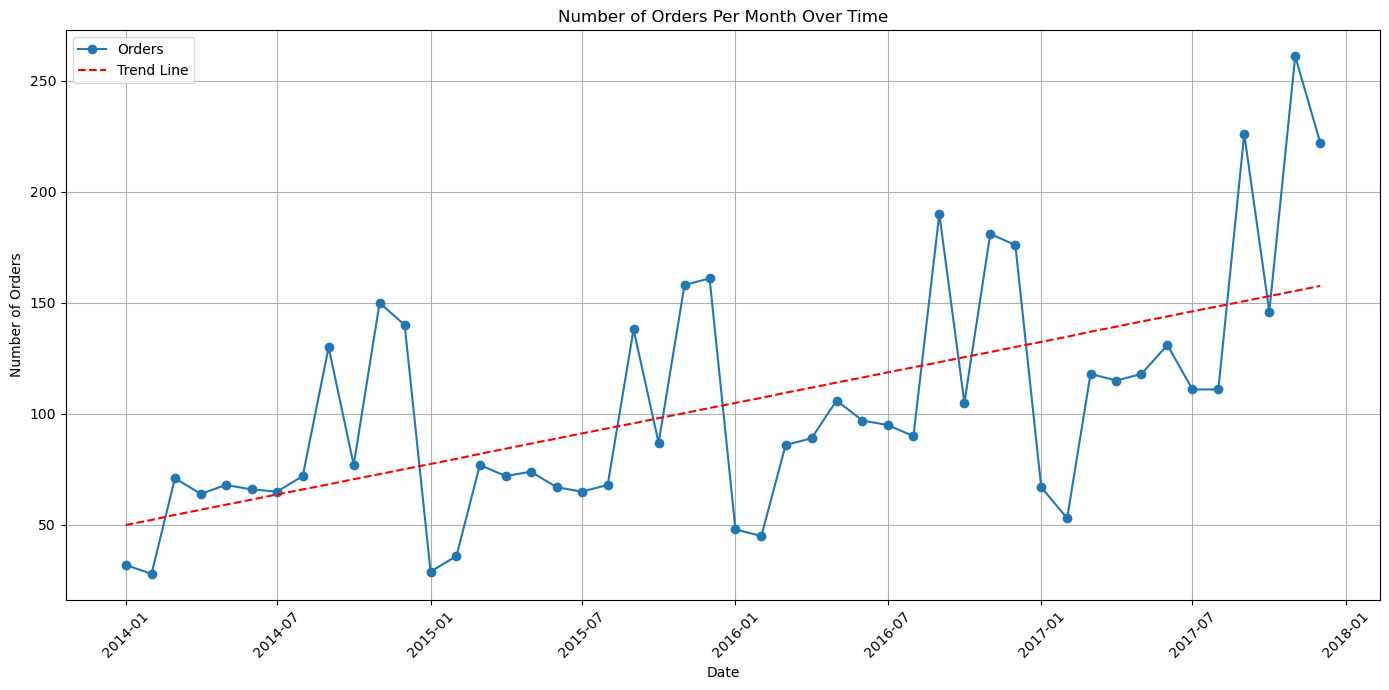

In [32]:
# Group by the date when the order was placed and count unique 'order_id' for each month
orders_per_month = data.groupby(data['date_ordered'].dt.to_period("M")).agg(orders_count=('order_id', 'nunique')).reset_index()
orders_per_month['date_ordered'] = orders_per_month['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Fit polynomial trend line for orders count
x_orders = np.arange(len(orders_per_month))
y_orders = orders_per_month['orders_count']
degree_orders = 1
coefficients_orders = np.polyfit(x_orders, y_orders, degree_orders)
p_orders = np.poly1d(coefficients_orders)

# Plotting the number of orders per month
plt.figure(figsize=(14, 7))
plt.plot(orders_per_month['date_ordered'], orders_per_month['orders_count'], marker='o', linestyle='-', label='Orders')
plt.plot(orders_per_month['date_ordered'], p_orders(x_orders), "r--", label='Trend Line')
plt.title('Number of Orders Per Month Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


**Order Fluctuations:** The graph shows how the total number of orders varies each month, with some months experiencing higher order volumes than others. These fluctuations could be influenced by factors such as seasonal demand, marketing campaigns, and changes in consumer behavior or economic conditions.

**Increasing Trend:** An upward trend would suggest that the business is successfully expanding its customer base or increasing the frequency of purchases among existing customers.

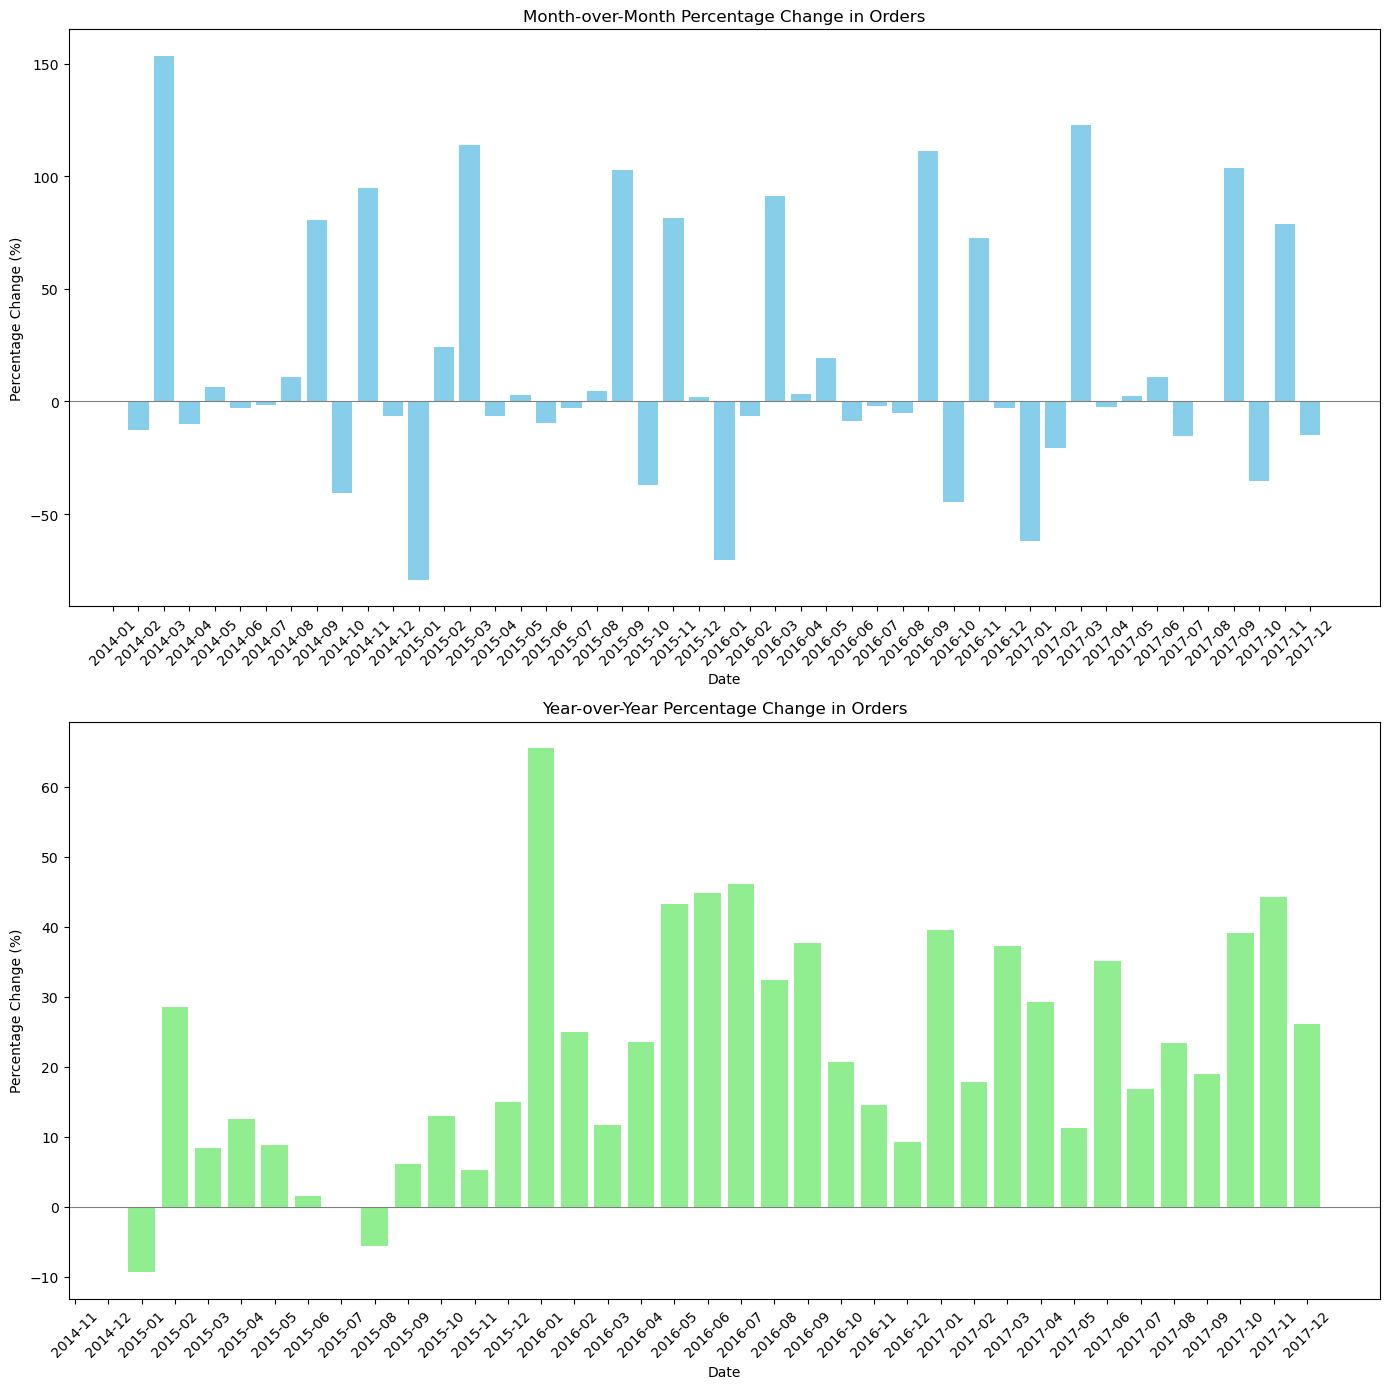

In [34]:
# Convert 'date_ordered' to datetime to ensure proper period handling
orders_per_month['date_ordered'] = pd.to_datetime(orders_per_month['date_ordered'])

# Calculate Month-over-Month percentage change
orders_per_month['MoM'] = orders_per_month['orders_count'].pct_change() * 100

# Calculate Year-over-Year percentage change by shifting the data by 12 months (1 year)
orders_per_month['YoY'] = orders_per_month['orders_count'].pct_change(periods=12) * 100

# Creating the plots for MoM and YoY changes
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Plotting Month-over-Month changes
ax[0].bar(orders_per_month['date_ordered'].dt.strftime('%Y-%m'), orders_per_month['MoM'], color='skyblue')
ax[0].set_title('Month-over-Month Percentage Change in Orders')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Percentage Change (%)')
ax[0].axhline(0, color='grey', linewidth=0.8)
ax[0].tick_params(axis='x', rotation=45)

# Plotting Year-over-Year changes
ax[1].bar(orders_per_month['date_ordered'].dt.strftime('%Y-%m'), orders_per_month['YoY'], color='lightgreen')
ax[1].set_title('Year-over-Year Percentage Change in Orders')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Percentage Change (%)')
ax[1].axhline(0, color='grey', linewidth=0.8)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Month-over-Month Changes:**

MoM Analysis: This graph shows the relative change in the number of orders from one month to the next. Positive values indicate an increase in orders compared to the previous month, while negative values indicate a decrease. This metric is sensitive to short-term fluctuations and can be influenced by seasonal variations, promotions, or other monthly events.

**Year-over-Year Changes:**

YoY Analysis: The second graph shows how the number of orders compares with the same month in the previous year. This comparison helps smooth out seasonal effects, providing a clearer picture of the longer-term trend in order growth or decline. Positive YoY changes suggest growth compared to the same month last year, while negative changes indicate a drop in orders.

**Trend Identification:**

Consistently positive trends in YoY metric signals underlying strength in the business strategy.

**Strategic Planning:**

Understanding these patterns can help in planning for future inventory, marketing campaigns, and other operational needs by anticipating busy or slow periods.


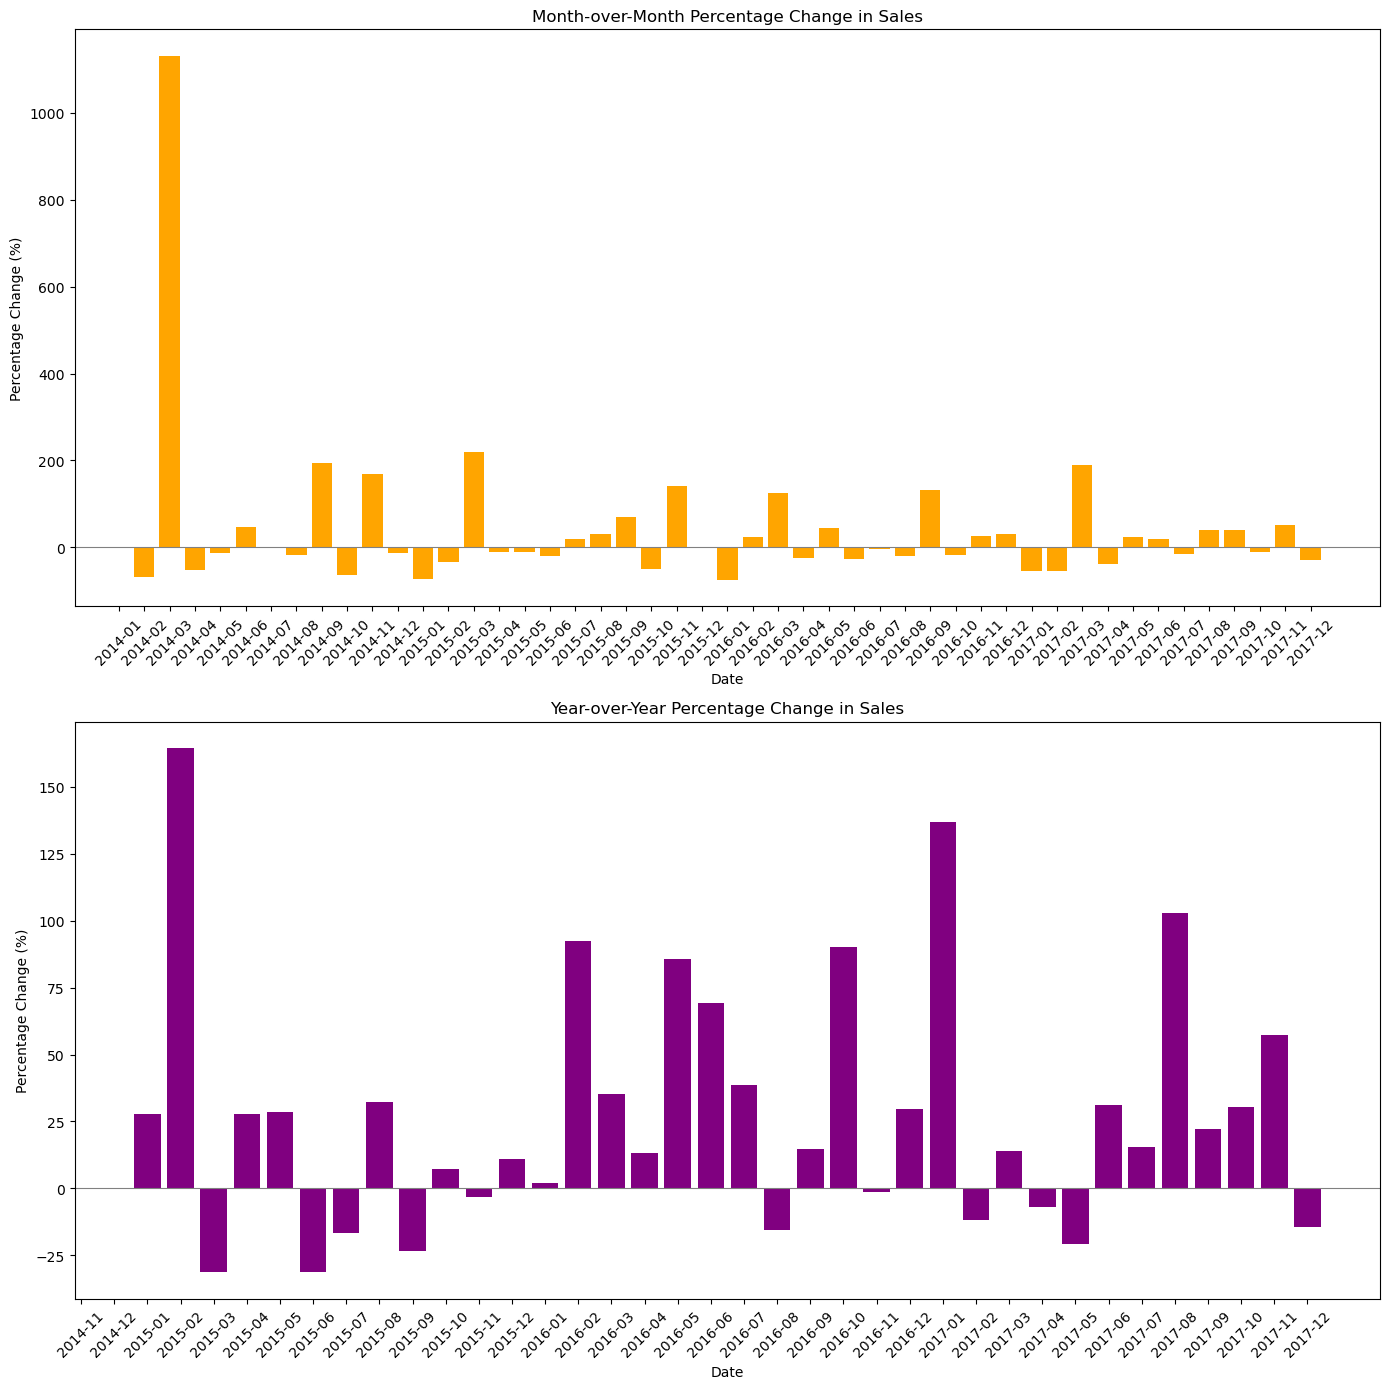

In [35]:
# Group by the date when the order was placed and sum sales for each month
sales_per_month = data.groupby(data['date_ordered'].dt.to_period("M")).agg(total_sales=('sales', 'sum')).reset_index()
sales_per_month['date_ordered'] = sales_per_month['date_ordered'].dt.to_timestamp()  # Convert back to timestamp for plotting

# Calculate Month-over-Month percentage change
sales_per_month['MoM'] = sales_per_month['total_sales'].pct_change() * 100

# Calculate Year-over-Year percentage change by shifting the data by 12 months (1 year)
sales_per_month['YoY'] = sales_per_month['total_sales'].pct_change(periods=12) * 100

# Creating the plots for MoM and YoY changes in sales
fig, ax = plt.subplots(2, 1, figsize=(14, 14))

# Plotting Month-over-Month changes
ax[0].bar(sales_per_month['date_ordered'].dt.strftime('%Y-%m'), sales_per_month['MoM'], color='orange')
ax[0].set_title('Month-over-Month Percentage Change in Sales')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Percentage Change (%)')
ax[0].axhline(0, color='grey', linewidth=0.8)
ax[0].tick_params(axis='x', rotation=45)

# Plotting Year-over-Year changes
ax[1].bar(sales_per_month['date_ordered'].dt.strftime('%Y-%m'), sales_per_month['YoY'], color='purple')
ax[1].set_title('Year-over-Year Percentage Change in Sales')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Percentage Change (%)')
ax[1].axhline(0, color='grey', linewidth=0.8)
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Month-over-Month Changes in Sales:**

Orange Bars: Each bar represents the percentage change in sales from one month to the next. Positive values indicate an increase in sales relative to the previous month, while negative values indicate a decrease. This metric highlights the short-term fluctuations in sales, which can be influenced by promotions, seasonal demand changes, or market dynamics.

**Year-over-Year Changes in Sales:**

Purple Bars: These bars show how the sales in a given month compare with the same month in the previous year. This metric is useful for understanding the long-term trends and smoothing out the seasonal effects, providing a clearer view of the business's growth trajectory. Positive YoY changes suggest that the business is growing compared to the same period last year, whereas negative changes indicate a reduction in sales.
